# Base model
**https://www.kaggle.com/code/ammfat/facial-emotion-recognition-vgg16-fer2013/notebook**

In [1]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image

In [2]:
# # Load the trained model
# model_vgg16 = load_model('/kaggle/input/my-dataset-pretrain-facial-emotion-recognition/VGG16_trainable_parameter.h5')

In [3]:
# # Print the model summary to inspect the layers, input shape, and output shape
# model_vgg16.summary()

# Reading test set for both model

In [4]:
# import os
# import cv2
# import numpy as np
# import pandas as pd
# from tensorflow.keras.preprocessing import image
# import time
# from tqdm import tqdm

# # Định nghĩa các class
# class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# # Đường dẫn đến thư mục test
# test_dir = '/kaggle/input/fer2013/test'

# Calculate performance for VGG model

In [5]:
# def evaluate_class(class_folder, model):
#     # Đường dẫn đến thư mục của class
#     folder_path = os.path.join(test_dir, class_folder)
    
#     # Lấy danh sách các file ảnh
#     image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
#     correct_predictions = 0
#     total_time = 0
#     predictions_list = []
    
#     # Xử lý từng ảnh
#     for img_file in tqdm(image_files, desc=f"Processing {class_folder}"):
#         img_path = os.path.join(folder_path, img_file)
        
#         # Đọc và tiền xử lý ảnh
#         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         img = cv2.resize(img, (48, 48))
        
#         # Chuyển grayscale thành RGB bằng cách stack 3 kênh
#         img_rgb = np.stack((img,)*3, axis=-1)
        
#         img_array = image.img_to_array(img_rgb)
#         img_array = np.expand_dims(img_array, axis=0)
#         img_array = img_array / 255.0  # Normalize pixel values
        
#         # Đo thời gian inference
#         start_time = time.time()
#         predictions = model.predict(img_array, verbose=0)
#         end_time = time.time()
        
#         total_time += (end_time - start_time)
        
#         # Lấy class được dự đoán
#         predicted_class = class_names[np.argmax(predictions)]
#         predictions_list.append(predicted_class)
        
#         # Kiểm tra dự đoán đúng
#         if predicted_class == class_folder:
#             correct_predictions += 1
    
#     # Tính toán các metrics
#     n_samples = len(image_files)
#     accuracy = correct_predictions / n_samples if n_samples > 0 else 0
#     avg_time = total_time / n_samples if n_samples > 0 else 0
    
#     return {
#         'class': class_folder,
#         'n_samples': n_samples,
#         'accuracy': accuracy,
#         'avg_inference_time': avg_time,
#         'total_time': total_time
#     }


In [6]:
# # Đánh giá từng class và lưu kết quả
# results = []
# for class_name in class_names:
#     result = evaluate_class(class_name, model_vgg16)
#     results.append(result)
#     print(f"\nResults for {class_name}:")
#     print(f"Number of samples: {result['n_samples']}")
#     print(f"Accuracy: {result['accuracy']:.4f}")
#     print(f"Average inference time: {result['avg_inference_time']*1000:.2f} ms")

# # Tính toán metrics tổng thể
# total_samples = sum(r['n_samples'] for r in results)
# weighted_accuracy = sum(r['accuracy'] * r['n_samples'] for r in results) / total_samples
# weighted_avg_time = sum(r['total_time'] for r in results) / total_samples

# print("\nOverall Results:")
# print("Class-wise results:")
# for r in results:
#     print(f"{r['class']}: Accuracy = {r['accuracy']:.4f}, "
#           f"Avg Time = {r['avg_inference_time']*1000:.2f} ms, "
#           f"Samples = {r['n_samples']}")

# print(f"\nWeighted Average Accuracy: {weighted_accuracy:.4f}")
# print(f"Average Inference Time per Image: {weighted_avg_time*1000:.2f} ms")

# # Tạo DataFrame để hiển thị kết quả
# results_df = pd.DataFrame(results)
# print("\nDetailed Results DataFrame:")
# print(results_df)

In [7]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Chuẩn bị dữ liệu
# classes = results_df['class']
# n_samples = results_df['n_samples'] / 10  # Scale down số lượng mẫu
# accuracies = results_df['accuracy'] * 100
# avg_times = results_df['avg_inference_time'] * 1000

# # Tạo vị trí cho các cột
# x = np.arange(len(classes))
# width = 0.25

# # Tạo figure
# plt.figure(figsize=(15, 8))

# # Tạo các cột
# bars1 = plt.bar(x - width, n_samples, width, label='Number of Samples (÷10)', color='skyblue')
# bars2 = plt.bar(x, accuracies, width, label='Accuracy', color='lightgreen')
# bars3 = plt.bar(x + width, avg_times, width, label='Avg Time', color='salmon')

# # Thêm giá trị và đơn vị lên từng cột
# def autolabel(bars, values, format_str):
#     for bar, val in zip(bars, values):
#         height = bar.get_height()
#         plt.text(bar.get_x() + bar.get_width()/2, height,
#                 format_str.format(val),
#                 ha='center', va='bottom')

# # Hiển thị giá trị gốc (chưa scale) cho số lượng mẫu
# autolabel(bars1, results_df['n_samples'], '{:.0f} samples')
# autolabel(bars2, accuracies, '{:.1f} %')
# autolabel(bars3, avg_times, '{:.2f} ms')

# # Tùy chỉnh đồ thị
# plt.xlabel('Classes', fontsize=12)
# plt.title('Comparison of Samples, Accuracy, and Processing Time by Emotion Class', fontsize=14)
# plt.xticks(x, classes, rotation=45)
# plt.legend()

# # Xóa label trục y và ẩn các đường kẻ của trục y
# plt.ylabel('')
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

# # Thêm grid để dễ đọc (chỉ theo chiều ngang)
# plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# # Tự động điều chỉnh layout
# plt.tight_layout()

# # Hiển thị đồ thị
# plt.show()

# Define my model

## 1. Reading training set

**This training set used for both VGG model and my model**<br>
**You can read the training VGG model notebook here 'https://www.kaggle.com/code/ammfat/facial-emotion-recognition-vgg16-fer2013/notebook'**

In [8]:
import math
import numpy as np
import pandas as pd

import cv2
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
df = pd.read_csv('/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [10]:
df =df[['emotion','pixels']]
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [11]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [12]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
counts = df.emotion.value_counts()
# Tạo Series value_counts
counts = df.emotion.value_counts()

# Tạo DataFrame mới với index từ 0-6
count_df = pd.DataFrame({
    'label': [emotion_label_to_text[i] for i in range(7)],
    'count': [counts.get(i, 0) for i in range(7)]
})

# Thêm cột index
count_df.index.name = 'index'

# Hiển thị bảng
print(count_df)

           label  count
index                  
0          anger   4953
1        disgust    547
2           fear   5121
3      happiness   8989
4        sadness   6077
5       surprise   4002
6        neutral   6198


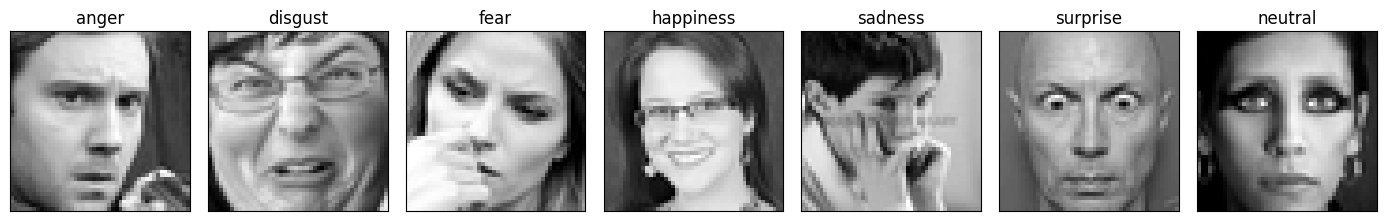

In [13]:
import numpy as np
from matplotlib import pyplot as plt

def plot_one_image_per_emotion(df, emotion_label_to_text):
    fig = plt.figure(figsize=(14, 14))
    unique_labels = sorted(df.emotion.unique())  # Lấy tất cả nhãn unique

    for i, label in enumerate(unique_labels, 1):  # Duyệt từng nhãn, bắt đầu index từ 1
        # Lấy ảnh đầu tiên của mỗi nhãn
        px = df[df.emotion == label].pixels.iloc[0]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        ax = fig.add_subplot(7, 7, i)  # Thêm subplot vào vị trí i
        ax.imshow(px, cmap='gray')     # Hiển thị ảnh
        ax.set_xticks([])              # Bỏ ticks x
        ax.set_yticks([])              # Bỏ ticks y
        ax.set_title(emotion_label_to_text[label])  # Đặt tiêu đề theo nhãn

    plt.tight_layout()
    plt.show()
plot_one_image_per_emotion(df, emotion_label_to_text)

In [14]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array = np.stack(img_array, axis = 0)
img_array.shape

(35887, 48, 48)

In [15]:
img_features = []

for i in range(len(img_array)):
    temp = cv2.cvtColor(img_array[i], cv2.COLOR_GRAY2RGB)
    img_features.append(temp)

img_features = np.array(img_features)
print(img_features.shape)
img_array = img_features

(35887, 48, 48, 3)


In [16]:
print(df['emotion'].shape)

(35887,)


In [17]:
type(img_array)

numpy.ndarray

## 2. Train/val split

In [18]:
X = img_array
y = df['emotion'].values

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:

print(f"Train set shape: \n X: {X_train.shape} \n y: {y_train.shape}")
print(f"Validation set shape: \n X: {X_val.shape}\n y: {y_val.shape}")

Train set shape: 
 X: (28709, 48, 48, 3) 
 y: (28709,)
Validation set shape: 
 X: (7178, 48, 48, 3)
 y: (7178,)


In [21]:
X_train /= 255.0
X_val /= 255.0

In [22]:
# Create a dictionary to store label counts
label_train_counts = {}
label_val_counts = {}

# Iterate through the labels in the training set
for label in y_train:
    if label in label_train_counts:
        label_train_counts[label] += 1
    else:
        label_train_counts[label] = 1

# Do the same for the validation set
for label in y_val:
    if label in label_val_counts:
        label_val_counts[label] += 1
    else:
        label_val_counts[label] = 1

for i in range(7):
    print(f'{i} label in train set - {label_train_counts[i]}\n {i} label in val set - {label_val_counts[i]}')


0 label in train set - 3968
 0 label in val set - 985
1 label in train set - 445
 1 label in val set - 102
2 label in train set - 4078
 2 label in val set - 1043
3 label in train set - 7224
 3 label in val set - 1765
4 label in train set - 4867
 4 label in val set - 1210
5 label in train set - 3207
 5 label in val set - 795
6 label in train set - 4920
 6 label in val set - 1278


## 3. Define model

### Version 1 (overfit)

In [23]:
import numpy as np
import tensorflow as tf
num_classes =len(emotion_label_to_text)
# Chuyển đổi nhãn y thành dạng one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)
print("Shape of y_train data:", y_train.shape)
print("Shape of y_val data:", y_val.shape)



Shape of y_train data: (28709, 7)
Shape of y_val data: (7178, 7)


In [24]:

# Tạo TensorFlow Dataset từ numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)


# Print shape of the first batch in train_dataset
for X_batch, y_batch in train_dataset.take(1):
    print("Train batch shape:", X_batch.shape)
    print("Train labels shape:", y_batch.shape)
    print("Train sample labels:", y_batch[:1].numpy())

# Print shape of the first batch in val_dataset
for X_batch, y_batch in val_dataset.take(1):
    print("Validation batch shape:", X_batch.shape)
    print("Validation labels shape:", y_batch.shape)
    print("Validation sample labels:", y_batch[:1].numpy())

Train batch shape: (32, 48, 48, 3)
Train labels shape: (32, 7)
Train sample labels: [[0. 0. 0. 0. 1. 0. 0.]]
Validation batch shape: (32, 48, 48, 3)
Validation labels shape: (32, 7)
Validation sample labels: [[0. 0. 0. 1. 0. 0. 0.]]


In [25]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # Tải mô hình ResNet-50 với các trọng số đã được huấn luyện trước trên ImageNet
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
# num_classes =len(emotion_label_to_text)

# # Thêm các lớp đầu ra phù hợp với bài toán của bạn
# x = base_model.output
# x = GlobalAveragePooling2D()(x)


# x = Dense(1024, activation='relu')(x)
# x = Dense(256, activation='relu')(x)  # New layer
# x = Dense(64, activation='relu')(x)  # New layer

# predictions = Dense(num_classes, activation='softmax')(x)  # num_classes là số lượng cảm xúc

# # Tạo mô hình hoàn chỉnh
# model = Model(inputs=base_model.input, outputs=predictions)

# # Đóng băng các lớp của mô hình gốc để không huấn luyện lại chúng
# for layer in base_model.layers:
#     layer.trainable = True

# # Biên dịch mô hình
# model.compile(
#     optimizer=Adam(learning_rate=1e-4),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )
# # In cấu trúc mô hình
# model.summary()

In [26]:
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=10,
#     batch_size=32,  # Specify batch size if not set in dataset
#     shuffle=True,  # Shuffle the training data before each epoch
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
#         tf.keras.callbacks.ModelCheckpoint("best_checkpoint.keras", save_best_only=True)
#     ],
#     verbose=2  # Adjust verbosity (0, 1, or 2) for logging output during training
# )


In [27]:
# model.save("model.h5")

In [28]:
# train_acc = history.history['accuracy']
# train_loss = history.history['loss']
# val_acc = history.history['val_accuracy']
# val_loss = history.history['val_loss']

In [29]:
# import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(train_acc)
# plt.plot(val_acc)
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(train_loss)
# plt.plot(val_loss)
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

## version 2

In [30]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Tải mô hình ResNet-50 với các trọng số đã được huấn luyện trước trên ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
num_classes =len(emotion_label_to_text)

# Thêm các lớp đầu ra phù hợp với bài toán của bạn
x = base_model.output
# chuyển đổi ouput -> 1D
x = GlobalAveragePooling2D()(x)


x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)  # New layer
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)  # New layer
x = Dropout(0.3)(x)

predictions = Dense(num_classes, activation='softmax')(x)  # num_classes là số lượng cảm xúc

# Tạo mô hình hoàn chỉnh
model = Model(inputs=base_model.input, outputs=predictions)

# Đóng băng các lớp của mô hình gốc để không huấn luyện lại chúng
for layer in base_model.layers[-3:]:
    layer.trainable = True

# Biên dịch mô hình
model.compile(
    optimizer=Adam(learning_rate=1e-6,amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# In cấu trúc mô hình
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 25,965,191 (99.05 MB)

 Trainable params: 25,912,071 (98.85 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [31]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    batch_size=32,  # Specify batch size if not set in dataset
    shuffle=True,  # Shuffle the training data before each epoch
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("best_checkpoint.keras", save_best_only=True)
    ],
    verbose=2  # Adjust verbosity (0, 1, or 2) for logging output during training
)


Epoch 1/100


I0000 00:00:1730887266.863813      69 service.cc:145] XLA service 0x78e7c0003db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730887266.863874      69 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730887266.863878      69 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1730887296.703092      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


898/898 - 148s - 165ms/step - accuracy: 0.1608 - loss: 2.5236 - val_accuracy: 0.2001 - val_loss: 5.7606
Epoch 2/100
898/898 - 44s - 49ms/step - accuracy: 0.1814 - loss: 2.2446 - val_accuracy: 0.2074 - val_loss: 2.6529
Epoch 3/100
898/898 - 45s - 50ms/step - accuracy: 0.2039 - loss: 2.1164 - val_accuracy: 0.2198 - val_loss: 2.6195
Epoch 4/100
898/898 - 45s - 50ms/step - accuracy: 0.2107 - loss: 2.0413 - val_accuracy: 0.2321 - val_loss: 2.5484
Epoch 5/100
898/898 - 45s - 50ms/step - accuracy: 0.2229 - loss: 1.9860 - val_accuracy: 0.2366 - val_loss: 2.4841
Epoch 6/100
898/898 - 45s - 50ms/step - accuracy: 0.2371 - loss: 1.9322 - val_accuracy: 0.2431 - val_loss: 2.4394
Epoch 7/100
898/898 - 45s - 50ms/step - accuracy: 0.2492 - loss: 1.8966 - val_accuracy: 0.2491 - val_loss: 2.3801
Epoch 8/100
898/898 - 45s - 50ms/step - accuracy: 0.2588 - loss: 1.8633 - val_accuracy: 0.2549 - val_loss: 2.3409
Epoch 9/100
898/898 - 45s - 50ms/step - accuracy: 0.2675 - loss: 1.8380 - val_accuracy: 0.2618 - v

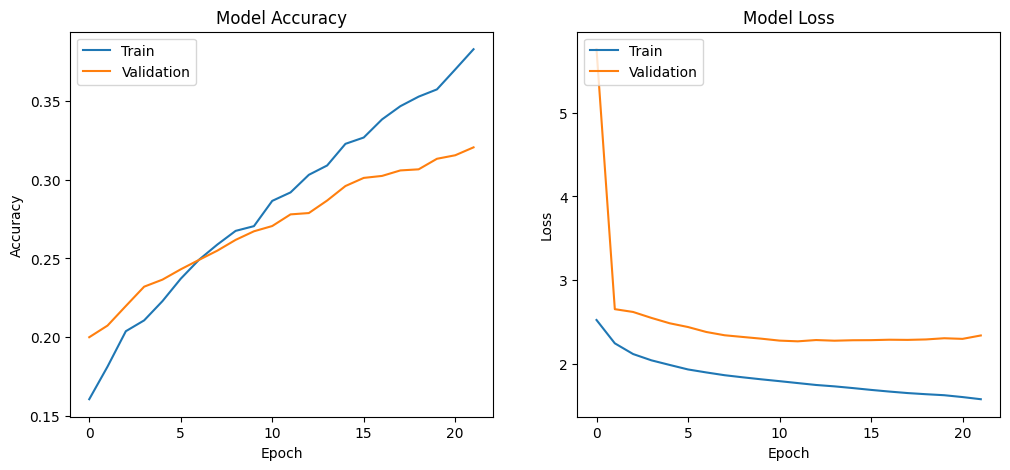

In [32]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss)
plt.plot(val_loss)
                                                                                            
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()